# Using Adaboost in Home Credit Default Risk
The below example shows how adaboost can be applied on this problem

In [1]:
#library
import math

import pandas as pd #pandas
import numpy as np #numpy
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier as ada #Adaboost
from sklearn.metrics import confusion_matrix as cf #confusion matrix
from sklearn.metrics import roc_curve, auc #ROC and AUC calculation

from scipy.stats import rankdata

In [2]:
#loading the data
trainingSet = pd.read_csv("application_train.csv")
testingSet = pd.read_csv("application_test.csv")

In [3]:
#Data preprocessing

#Filling Missing Data
trainingSet = trainingSet.fillna(0)
testingSet = testingSet.fillna(0)

#Splitting training and testing X Y
trainY = trainingSet["TARGET"]
trainX = trainingSet.drop(columns = ["SK_ID_CURR", "TARGET"])
testX = testingSet.drop(columns = ["SK_ID_CURR"])

#dummy variables
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)
trainX, testX = trainX.align(testX, join = "inner", axis = 1)

In [4]:
trainX.to_csv("trainX.csv",index=False)
testX.to_csv("testX.csv",index = False)

In [5]:
#Setting up a class for Adaboost
base_estimator = None #default is 1 level desicion tree, change it to any classifier if you wish to
n_estimators = 20 #the max number of n the boosting needs to stop
random_state = 938 #PS938, "seed"

model = ada(base_estimator = base_estimator, n_estimators = n_estimators, random_state = random_state) #setting up adaboost

In [6]:
#fit the model
a = model.fit(trainX,trainY)

In [7]:
#do the prediction
trainY_pred = model.predict_proba(trainX)[:, 1]

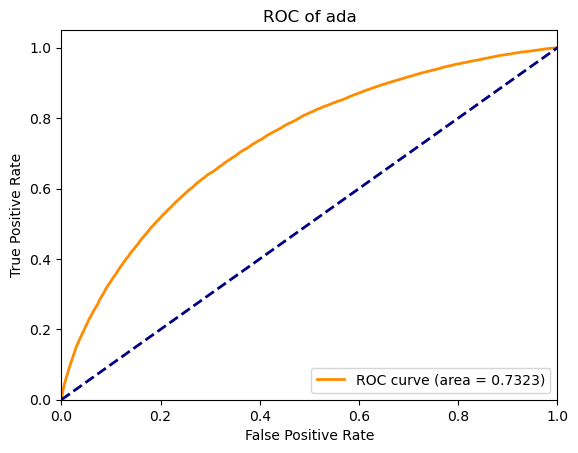

In [8]:
fpr, tpr, _ = roc_curve(trainY, trainY_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.4f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of ada")
plt.legend(loc="lower right")
plt.show()

In [9]:
#output the prediction for the submission
test_Y = model.predict_proba(testX)[:, 1]

In [10]:
df1 = pd.DataFrame(test_Y, columns=["TARGET"])
df2 = testingSet['SK_ID_CURR']

In [11]:
df3 = pd.concat([df2,df1 ], axis=1)
df3.to_csv("result.csv",index=False)

### Miscellaneous
For analyzing the data

In [12]:
maxN = 50

aucList = []

for i in range(1,maxN+1):
    modelx = ada(base_estimator = base_estimator, n_estimators = i, random_state = random_state) #setting up adaboost
    ax = modelx.fit(trainX,trainY)
    resu = modelx.predict_proba(trainX)[:, 1]
    f, t, _ = roc_curve(trainY, resu)
    roc_auc = auc(f, t)
    
    aucList.append(roc_auc)

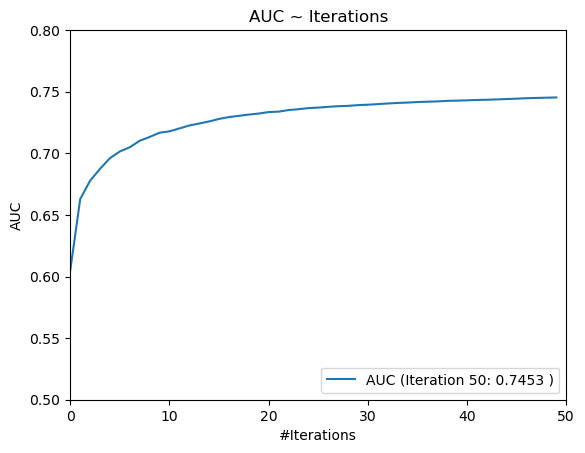

In [13]:
#plotting convergence of adaboost

plt.xlabel("#Iterations")
plt.ylabel("AUC")
plt.plot(range(maxN),aucList, label="AUC (Iteration 50: %0.4f )"% aucList[49]) 
plt.xlim([0.0, maxN])
plt.ylim([0.5, 0.8])
plt.title("AUC ~ Iterations")
plt.legend(loc="lower right")

In [17]:
#Find the r2 of data against target
correlation = trainingSet.corr()
max(correlation["TARGET"][2:]*correlation["TARGET"][2:])

0.025290438010928822

In [18]:
#getting feature importance
df4 = pd.DataFrame(model.feature_importances_, columns=["Importance"])
df5 = pd.DataFrame(trainX.columns, columns = ["Name"])
pd.concat([df5,df4], axis=1).sort_values('Importance', ascending = False).head(20)

,Name,Importance
29,EXT_SOURCE_3,0.25
28,EXT_SOURCE_2,0.20
3,AMT_ANNUITY,0.10
128,NAME_EDUCATION_TYPE_Higher education,0.05
109,FLAG_OWN_CAR_Y,0.05
4,AMT_GOODS_PRICE,0.05
6,DAYS_BIRTH,0.05
7,DAYS_EMPLOYED,0.05
107,CODE_GENDER_M,0.05
27,EXT_SOURCE_1,0.05
